In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rc, rcParams
rc('axes', linewidth=5)

from remat.core.dfgraph import gen_linear_graph
from experiments.common.load_keras_model import get_keras_model, CHAIN_GRAPH_MODELS, SEGMENTATION_MODEL_NAMES
from remat.core.solvers.strategy_checkpoint_all import solve_checkpoint_all
from remat.tensorflow2.extraction import dfgraph_from_keras
from remat.core.solvers.strategy_chen import solve_chen_sqrtn, solve_chen_greedy
from remat.core.solvers.strategy_optimal_ilp import solve_ilp_gurobi
from remat.core.solvers.strategy_griewank import solve_griewank

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import LayerNormalization, Dense, Activation, Lambda, Reshape

sns.set('talk')
sns.set_style('white')
RED = "#e74c3c"
BLUE = "#3498db"
flatui = [RED, BLUE, "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)

block1_conv1 ['input_35']
block1_conv2 ['block1_conv1']
block1_pool ['block1_conv2']
block2_conv1 ['block1_pool']
block2_conv2 ['block2_conv1']
block2_pool ['block2_conv2']
block3_conv1 ['block2_pool']
block3_conv2 ['block3_conv1']
block3_conv3 ['block3_conv2']
block3_conv4 ['block3_conv3']
block3_pool ['block3_conv4']
block4_conv1 ['block3_pool']
block4_conv2 ['block4_conv1']
block4_conv3 ['block4_conv2']
block4_conv4 ['block4_conv3']
block4_pool ['block4_conv4']
block5_conv1 ['block4_pool']
block5_conv2 ['block5_conv1']
block5_conv3 ['block5_conv2']
block5_conv4 ['block5_conv3']
block5_pool ['block5_conv4']
flatten ['block5_pool']
fc1 ['flatten']
fc2 ['fc1']
predictions ['fc2']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Parameter LogToConsole unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Parameter LogFile unchanged
   Value:   Default: 
Changed value of parameter Threads to 12
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter Time

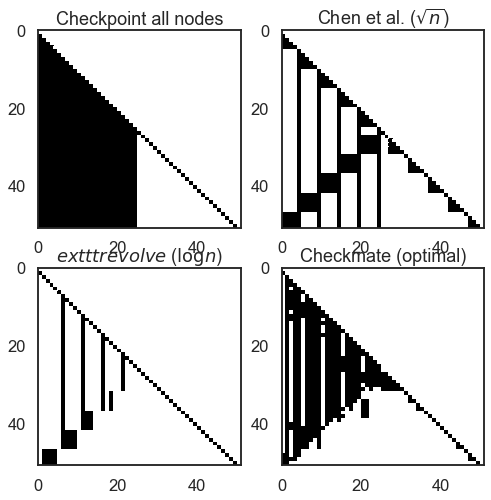

In [52]:
def plot_matrix(R, ax, title=None):
    ax.invert_yaxis()
    ax.pcolormesh(R, cmap="Greys", vmin=0, vmax=1)
    ax.set_title(title)

def solve_models(g):
    checkpoint_all = solve_checkpoint_all(g)
    chen_sqrtn = solve_chen_sqrtn(g, True)
    griewank = solve_griewank(g, 5)
    optimal = solve_ilp_gurobi(g, griewank.schedule_aux_data.activation_ram, approx=False,
                               solve_r=False, seed_s=chen_sqrtn.schedule_aux_data.S)
    return checkpoint_all, chen_sqrtn, griewank, optimal
    
def plot_model(sols):
    checkpoint_all, chen_sqrtn, griewank, optimal = sols
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    plot_matrix(checkpoint_all.schedule_aux_data.S, axs[0, 0], title="Checkpoint all nodes")
    plot_matrix(chen_sqrtn.schedule_aux_data.S, axs[0, 1], title="Chen et al. ($\sqrt{n}$)")
    plot_matrix(griewank.schedule_aux_data.S, axs[1, 0], title="$\texttt{revolve}$ ($\log{n}$)")
    plot_matrix(optimal.schedule_aux_data.S, axs[1, 1], title="Checkmate (optimal)")
    plt.plot(fig=fig)
    return fig

model = get_keras_model("VGG19")
# g = gen_linear_graph(16)
g = dfgraph_from_keras(model)
print(g.vfwd)
checkpoint_all, chen_sqrtn, griewank, optimal = solve_models(g)
fig = plot_model((checkpoint_all, chen_sqrtn, griewank, optimal))
fig.savefig('out.pdf', bbox_inches='tight')


for method in [checkpoint_all, chen_sqrtn, griewank, optimal]:
    aux_data = method.schedule_aux_data
    print(aux_data.cpu / 1e9, aux_data.activation_ram / 1e6)

block1_conv1 ['input_36']
block1_conv2 ['block1_conv1']
block1_pool ['block1_conv2']
block2_conv1 ['block1_pool']
block2_conv2 ['block2_conv1']
block2_pool ['block2_conv2']
block3_conv1 ['block2_pool']
block3_conv2 ['block3_conv1']
block3_conv3 ['block3_conv2']
block3_conv4 ['block3_conv3']
block3_pool ['block3_conv4']
block4_conv1 ['block3_pool']
block4_conv2 ['block4_conv1']
block4_conv3 ['block4_conv2']
block4_conv4 ['block4_conv3']
block4_pool ['block4_conv4']
block5_conv1 ['block4_pool']
block5_conv2 ['block5_conv1']
block5_conv3 ['block5_conv2']
block5_conv4 ['block5_conv3']
block5_pool ['block5_conv4']
flatten ['block5_pool']
fc1 ['flatten']
fc2 ['fc1']
predictions ['fc2']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Checkpoint all activation ram 81723296
Chen activation ram 69447584
Griewank activation ram 51380224
Parameter LogToConsole unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Parameter LogFile unchanged
   Value:   Defaul

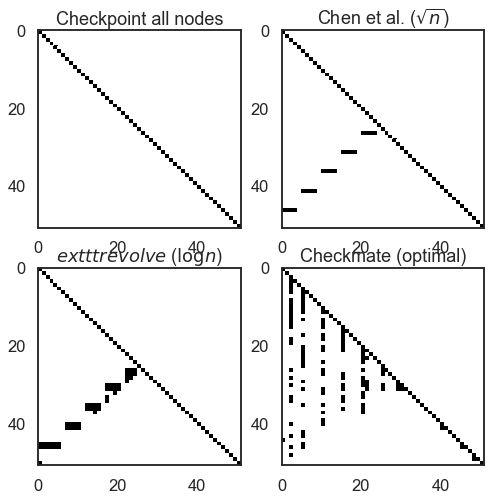

In [53]:
def plot_matrix(R, ax, title=None):
    ax.invert_yaxis()
    ax.pcolormesh(R, cmap="Greys", vmin=0, vmax=1)
    ax.set_title(title)

def solve_models(g):
    checkpoint_all = solve_checkpoint_all(g)
    print("Checkpoint all activation ram", checkpoint_all.schedule_aux_data.activation_ram)
    chen_sqrtn = solve_chen_sqrtn(g, True)
    print("Chen activation ram", chen_sqrtn.schedule_aux_data.activation_ram)
    griewank = solve_griewank(g, 5)
    print("Griewank activation ram", griewank.schedule_aux_data.activation_ram)
    optimal = solve_ilp_gurobi(g, griewank.schedule_aux_data.activation_ram, approx=False,
                               solve_r=False, seed_s=chen_sqrtn.schedule_aux_data.S)
    print("optimal activation ram", optimal.schedule_aux_data.activation_ram)
    return checkpoint_all, chen_sqrtn, griewank, optimal
    
def plot_model(sols):
    checkpoint_all, chen_sqrtn, griewank, optimal = sols
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    plot_matrix(checkpoint_all.schedule_aux_data.R, axs[0, 0], title="Checkpoint all nodes")
    plot_matrix(chen_sqrtn.schedule_aux_data.R, axs[0, 1], title="Chen et al. ($\sqrt{n}$)")
    plot_matrix(griewank.schedule_aux_data.R, axs[1, 0], title="$\texttt{revolve}$ ($\log{n}$)")
    plot_matrix(optimal.schedule_aux_data.R, axs[1, 1], title="Checkmate (optimal)")
    plt.plot(fig=fig)
    return fig

model = get_keras_model("VGG19")
# g = gen_linear_graph(16)
g = dfgraph_from_keras(model)
print(g.vfwd)
checkpoint_all, chen_sqrtn, griewank, optimal = solve_models(g)
fig = plot_model((checkpoint_all, chen_sqrtn, griewank, optimal))
fig.savefig('out.pdf', bbox_inches='tight')


for method in [checkpoint_all, chen_sqrtn, griewank, optimal]:
    aux_data = method.schedule_aux_data
    print(aux_data.cpu / 1e9, aux_data.activation_ram / 1e6)

block1_conv1 ['input_30']
block1_conv2 ['block1_conv1']
block1_pool ['block1_conv2']
block2_conv1 ['block1_pool']
block2_conv2 ['block2_conv1']
block2_pool ['block2_conv2']
block3_conv1 ['block2_pool']
block3_conv2 ['block3_conv1']
block3_conv3 ['block3_conv2']
block3_conv4 ['block3_conv3']
block3_pool ['block3_conv4']
block4_conv1 ['block3_pool']
block4_conv2 ['block4_conv1']
block4_conv3 ['block4_conv2']
block4_conv4 ['block4_conv3']
block4_pool ['block4_conv4']
block5_conv1 ['block4_pool']
block5_conv2 ['block5_conv1']
block5_conv3 ['block5_conv2']
block5_conv4 ['block5_conv3']
block5_pool ['block5_conv4']
flatten ['block5_pool']
fc1 ['flatten']
fc2 ['fc1']
predictions ['fc2']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Checkpoint all activation ram 81723296
Chen activation ram 69447584
Griewank activation ram 51380224
Parameter LogToConsole unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Parameter LogFile unchanged
   Value:   Defaul

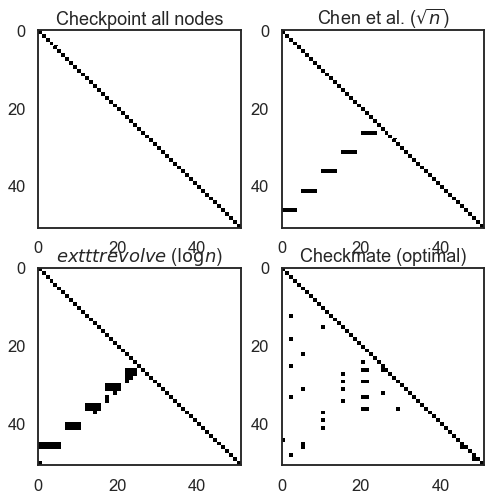

In [47]:
def plot_matrix(R, ax, title=None):
    ax.invert_yaxis()
    ax.pcolormesh(R, cmap="Greys", vmin=0, vmax=1)
    ax.set_title(title)

def solve_models(g):
    checkpoint_all = solve_checkpoint_all(g)
    print("Checkpoint all activation ram", checkpoint_all.schedule_aux_data.activation_ram)
    chen_sqrtn = solve_chen_sqrtn(g, True)
    print("Chen activation ram", chen_sqrtn.schedule_aux_data.activation_ram)
    griewank = solve_griewank(g, 5)
    print("Griewank activation ram", griewank.schedule_aux_data.activation_ram)
    optimal = solve_ilp_gurobi(g, griewank.schedule_aux_data.activation_ram, approx=False,
                               solve_r=True, seed_s=chen_sqrtn.schedule_aux_data.S)
    print("optimal activation ram", optimal.schedule_aux_data.activation_ram)
    return checkpoint_all, chen_sqrtn, griewank, optimal
    
def plot_model(sols):
    checkpoint_all, chen_sqrtn, griewank, optimal = sols
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    plot_matrix(checkpoint_all.schedule_aux_data.R, axs[0, 0], title="Checkpoint all nodes")
    plot_matrix(chen_sqrtn.schedule_aux_data.R, axs[0, 1], title="Chen et al. ($\sqrt{n}$)")
    plot_matrix(griewank.schedule_aux_data.R, axs[1, 0], title="$\texttt{revolve}$ ($\log{n}$)")
    plot_matrix(optimal.schedule_aux_data.R, axs[1, 1], title="Checkmate (optimal)")
    plt.plot(fig=fig)
    return fig

model = get_keras_model("VGG19")
# g = gen_linear_graph(16)
g = dfgraph_from_keras(model)
print(g.vfwd)
checkpoint_all, chen_sqrtn, griewank, optimal = solve_models(g)
fig = plot_model((checkpoint_all, chen_sqrtn, griewank, optimal))
fig.savefig('out.pdf', bbox_inches='tight')


for method in [checkpoint_all, chen_sqrtn, griewank, optimal]:
    aux_data = method.schedule_aux_data
    print(aux_data.cpu / 1e9, aux_data.activation_ram / 1e6)

58.896187392 81.723296
72.512667648 69.447584
108.266881024 51.380224
58.98289152 51.380224


In [54]:
!git lg

* c62ac61 - (HEAD -> mlsys20_artifact, origin/mlsys20_artifact) Update README.md (2 days ago) <Ajay Jain>
* c0def2e - (tag: 0.1.4) Fix issues as cited in reproducibility reviews (9 days ago) <Paras Jain>
* a91771a - (tag: 0.1.3) Update README with CPU instructions (2 weeks ago) <Ajay Jain>
* b512f72 - (tag: v0.1.1, tag: 0.1.2) Update README.md, add --num-threads (6 weeks ago) <Ajay Jain>
* 4687d0e - Replace README.md (6 weeks ago) <Ajay Jain>
* 73a0e27 - Fix bug with max BS plotting (6 weeks ago) <Ajay Jain>
* 1d65ec7 - Add artifact instructions (6 weeks ago) <Ajay Jain>
* 06bccf7 - Add dependencies to setup.py (6 weeks ago) <Ajay Jain>
* c4d59f0 - Add constraints on Free_E to max BS ILP (6 weeks ago) <Ajay Jain>
* 1d62be7 - Remove approximations from budget sweep (6 weeks ago) <Ajay Jain>
* 11eaf40 - (tag: v0.1.0) Add integrality gap experiment and LP strategy (#48) (3 months ago) <Ajay Jain>
* 820dc61 - Create table_approx_speedup_ratios.py (#53) (3 months ago) <Paras Jain>
* de5c706

In [55]:
g